In [1]:
import pandas as pd
dd_users = pd.read_csv('../../Archivos_tfm/dataTesting/usuarios_DD_1809a1110.csv')
dd_users.head()

,Código de cliente,Usuarios
0,F10001681,1
1,F10004567,1
2,F10007287,1
3,F10019099,1
4,F10020552,1


In [2]:
# Cambiamos el nombre de la columna
dd_users.columns = ['ID','Usuarios']

# Eliminamos la columna usuarios, ya que no la vamos a necesitar
dd_users.drop('Usuarios',1, inplace=True)
dd_users.head()

#Esta lista de usuarios es sobre la que vamos a centrar todo nuestro trabajo e iremos añadiendole columnas.

,ID
0,F10001681
1,F10004567
2,F10007287
3,F10019099
4,F10020552


Ya tenemos los usuarios que han accedido al proceso que nos interesa, limpios y preparados para añadirles contenido útil para el algoritmo.

Tenemos que trabajar de esta manera porque google analytics al intentar sacar todos estos datos ya filtrados por el proceso que nos interesa, digamos que hace cosas raras y perdemos usuarios en el camino. Por lo que tenemos que ir haciendo consultas muy simples, las cuales manipularemos y añadiremos a nuestros queridos usuarios.

# Añadimos la profundidad del proceso
Esta nueva característica nos aporta información acerca de cuan lejos a llegado el usuario en el proceso.

Debemos hacer una consulta en google analytics en la que tengamos:
 - ID usuario
 - Páginas del proceso en las que ha estado el usuario
 - Una métrica neutral (para no perder usuarios) como usuarios.

In [3]:
profundidad = pd.read_csv('../../Archivos_tfm/dataTesting/profundidad.csv', index_col=0)
profundidad.drop('neutral_metric',1,inplace=True)
profundidad.head()
# El csv ya tenía indice porque lo he modificado previamente para no mostrar
# el nombre real de las pantallas de proceso, por eso usamos index_col=0.
# Eliminamos la columna neutral_metric, solo la necesitabamos para hacer la consulta en google analytics.

,ID,page
0,F10001681,page1
1,F10004567,page1
2,F10007287,page2
3,F10007287,page3
4,F10007287,page1


El objetivo es obtener un nuevo dataframe que contenga por columnas... usuarios únicos y profundidad.
Básicamente vamos a hacer el "The word-count problem" con nuestro dataframe. Ya que un usuarios puede aparecer hasta 4 veces... una por cada paso del proceso.

In [4]:
list_users = profundidad['ID']
list_users.head()

0    F10001681
1    F10004567
2    F10007287
3    F10007287
4    F10007287
Name: ID, dtype: object

In [5]:
def countUsers(lista):
    """
    method para contar veces que aparece un usuario
    
    inputs:
        *lista: lista de usuarios
        
    output: diccionario de {'ID usuario':profundidad en el proceso}
    """
    # Creamos un diccionario vacío
    hist = {}
    
    for user in lista:
        if user in hist:
            hist[user] += 1
        else:
            hist[user] = 1
            
    return hist

dict_user = countUsers(list_users)
# Transformamos nuestro diccionario en un dataframe
profundidad = pd.DataFrame(dict_user.items(), columns=['ID','Profundidad'])
profundidad.head()

,ID,Profundidad
0,F7192075,4
1,F5501691,1
2,F9733307,4
3,F13669657,4
4,F10542990,1


Ya tenemos creada la profundidad del proceso, ahora debemos añadir esta nueva caracteristica a dd_users.

In [6]:
dd_users = pd.merge(dd_users,profundidad, on = 'ID')

In [7]:
moreFeatures = pd.read_csv('../../Archivos_tfm/dataTesting/usersFeatures_1809a1110.csv')
moreFeatures.head()

,Código de cliente,Sesiones,Visualizaciones de pantalla,Visualizaciones de pantallas únicas,Duración media de la sesión
0,F17951363,2,26,5,14357.0
1,F4365779,1,227,19,8980.0
2,F38210444,1,59,10,8051.0
3,F45520753,2,139,10,7271.5
4,F46435415,1,80,16,7187.0


In [8]:
moreFeatures.columns = ['ID','sesiones','visualizaciones','visualizacionesUnicas','duracionMediaSesion']

In [9]:
moreFeatures.head()

,ID,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion
0,F17951363,2,26,5,14357.0
1,F4365779,1,227,19,8980.0
2,F38210444,1,59,10,8051.0
3,F45520753,2,139,10,7271.5
4,F46435415,1,80,16,7187.0


In [10]:
dd_users = pd.merge(dd_users,moreFeatures, on = 'ID')

In [11]:
dd_users['visualizacionesPorSesion'] = (dd_users['visualizaciones']/dd_users['sesiones'])

In [12]:
dd_users.head()

,ID,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion
0,F10001681,1,3,53,16,1246.333333,17.666667
1,F10004567,1,111,1419,409,167.756757,12.783784
2,F10007287,4,68,935,301,155.485294,13.750000
3,F10019099,4,10,111,48,112.500000,11.100000
4,F10020552,1,3,48,15,140.333333,16.000000


In [13]:
dd_users['visualizacionesUnicasPorSesion'] = (dd_users['visualizacionesUnicas']/dd_users['sesiones'])

In [14]:
dd_users

,ID,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion,visualizacionesUnicasPorSesion
0,F10001681,1,3,53,16,1246.333333,17.666667,5.333333
1,F10004567,1,111,1419,409,167.756757,12.783784,3.684685
2,F10007287,4,68,935,301,155.485294,13.750000,4.426471
3,F10019099,4,10,111,48,112.500000,11.100000,4.800000
4,F10020552,1,3,48,15,140.333333,16.000000,5.000000
5,F10024071,1,3,47,17,483.333333,15.666667,5.666667
6,F10026447,4,36,409,126,277.277778,11.361111,3.500000
7,F10027084,1,1,60,13,410.000000,60.000000,13.000000
8,F10029572,4,34,319,123,152.294118,9.382353,3.617647
9,F100318,4,15,286,94,349.933333,19.066667,6.266667


In [15]:
# Añadimos otras cuatro features que nos dan el tiempo medio (en segundos) que ha estado cada usuario en
# cada página del proceso

In [16]:
timepage1 = pd.read_csv('../../Archivos_tfm/dataTesting/Tiempo1_1809a1110.csv')
timepage1.columns = ['ID','avgTimePage1']
timepage2 = pd.read_csv('../../Archivos_tfm/dataTesting/Tiempo2_1809a1110.csv')
timepage2.columns = ['ID','avgTimePage2']
timepage3 = pd.read_csv('../../Archivos_tfm/dataTesting/Tiempo3_1809a1110.csv')
timepage3.columns = ['ID','avgTimePage3']
# No añado el tiempo en la página final del proceso porque al tratarse de una página en la que se
# confirma que la compra ha sido realizada, el tiempo que esté en esta página no tiene importancia
# para mi objetivo.

dd_users = pd.merge(dd_users,timepage1,how='left', on = 'ID')
dd_users = pd.merge(dd_users,timepage2,how='left', on = 'ID')
dd_users = pd.merge(dd_users,timepage3,how='left', on = 'ID')




In [17]:
# No queremos tener en cuenta los usuarios cuyo tiempo en la primera página es NaN.
dd_users = dd_users[dd_users['avgTimePage1'].notnull()]

In [18]:
# Añadimos una columna más que sea la suma de las tres anteriores... con esto obviamente conseguimos
# El tiempo medio que cada usuario a empleado en el proceso.
# Para poder sumar debemos sustituir los NaNs por cero.
dd_users = dd_users.fillna(0)

dd_users ['avgTimeInTheProcess'] = dd_users['avgTimePage1'] + dd_users['avgTimePage2'] + dd_users['avgTimePage3']

# Y una columna más que sea la resta entre la duración media de la sesion y el tiempo medio en el proceso
# Con esto obtendremos el tiempo medio que el usuario está en nuestro sitio web realizando cualquier
# actividad ajena a lo que nos interesa para el proceso de compra.

dd_users ['avgTimeOutOfTheProcess'] = dd_users['duracionMediaSesion'] - dd_users['avgTimeInTheProcess']

dd_users

,ID,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion,visualizacionesUnicasPorSesion,avgTimePage1,avgTimePage2,avgTimePage3,avgTimeInTheProcess,avgTimeOutOfTheProcess
0,F10001681,1,3,53,16,1246.333333,17.666667,5.333333,10.000000,0.000000,0.0,10.000000,1236.333333
1,F10004567,1,111,1419,409,167.756757,12.783784,3.684685,3.000000,0.000000,0.0,3.000000,164.756757
2,F10007287,4,68,935,301,155.485294,13.750000,4.426471,8.800000,7.333333,0.0,16.133333,139.351961
3,F10019099,4,10,111,48,112.500000,11.100000,4.800000,18.000000,5.000000,16.0,39.000000,73.500000
4,F10020552,1,3,48,15,140.333333,16.000000,5.000000,14.000000,0.000000,0.0,14.000000,126.333333
6,F10026447,4,36,409,126,277.277778,11.361111,3.500000,11.590909,12.888889,28.0,52.479798,224.797980
7,F10027084,1,1,60,13,410.000000,60.000000,13.000000,2.000000,0.000000,0.0,2.000000,408.000000
8,F10029572,4,34,319,123,152.294118,9.382353,3.617647,25.750000,11.000000,40.0,76.750000,75.544118
9,F100318,4,15,286,94,349.933333,19.066667,6.266667,11.500000,8.500000,14.0,34.000000,315.933333
10,F10031853,4,18,190,79,213.055556,10.555556,4.388889,6.000000,4.000000,9.0,19.000000,194.055556


In [42]:
# Añadimos más features

processViews = (pd.read_csv('../../Archivos_tfm/dataTesting/visualizacionespantallasproceso_1809a1110.csv',
                            index_col=0))
#processViews = (processViews[processViews['page']=='page1'].drop('page',1).
               #rename(columns = {'PageProcessViews':'visitsToTheProcess',
                                #'uniquePageProcessViews':'uniqueVisitsToTheProcess'}))


dd_users = (pd.merge(dd_users,processViews[processViews['page']=='page1'].drop('page',1).
               rename(columns = {'PageProcessViews':'visitsToTheProcess',
                                'uniquePageProcessViews':'uniqueVisitsToTheProcess'}),how='left', on = 'ID'))
#dd_users.rename(columns = {'PageProcessViews':'visitsToTheProcess','uniquePageProcessViews':'uniqueVisitsToTheProcess'})
dd_users

,ID,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion,visualizacionesUnicasPorSesion,avgTimePage1,avgTimePage2,avgTimePage3,avgTimeInTheProcess,avgTimeOutOfTheProcess,visitsToTheProcess,uniqueVisitsToTheProcess
0,F10001681,1,3,53,16,1246.333333,17.666667,5.333333,10.000000,0.000000,0.0,10.000000,1236.333333,1,1
1,F10004567,1,111,1419,409,167.756757,12.783784,3.684685,3.000000,0.000000,0.0,3.000000,164.756757,1,1
2,F10007287,4,68,935,301,155.485294,13.750000,4.426471,8.800000,7.333333,0.0,16.133333,139.351961,10,6
3,F10019099,4,10,111,48,112.500000,11.100000,4.800000,18.000000,5.000000,16.0,39.000000,73.500000,1,1
4,F10020552,1,3,48,15,140.333333,16.000000,5.000000,14.000000,0.000000,0.0,14.000000,126.333333,1,1
5,F10026447,4,36,409,126,277.277778,11.361111,3.500000,11.590909,12.888889,28.0,52.479798,224.797980,22,7
6,F10027084,1,1,60,13,410.000000,60.000000,13.000000,2.000000,0.000000,0.0,2.000000,408.000000,1,1
7,F10029572,4,34,319,123,152.294118,9.382353,3.617647,25.750000,11.000000,40.0,76.750000,75.544118,4,4
8,F100318,4,15,286,94,349.933333,19.066667,6.266667,11.500000,8.500000,14.0,34.000000,315.933333,2,1
9,F10031853,4,18,190,79,213.055556,10.555556,4.388889,6.000000,4.000000,9.0,19.000000,194.055556,1,1


,ID,visitsToTheProcess,uniqueVisitsToTheProcess
1,F15492388,61,26
2,F40355431,58,29
4,F8928245,53,41
5,F36797692,51,41
6,F44608950,46,31
7,F6012287,46,42
9,F31811913,43,4
10,F45024583,43,12
11,F19887539,41,13
12,F34445752,41,19


## Primer intento machine learning

# K VECINOS

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
#importamos iris
from sklearn import datasets

In [24]:
# Hay que añadir una columna nueva con la etiqueta
# Si la profundidad es 4 la etiqueta es 1, si no la etiqueta es 0

dd_users['Y'] = dd_users['Profundidad']

In [25]:
dd_users['Y'] = (dd_users['Y'].replace(to_replace=[4,3,2,1],
           value=[1,0,0,0]))

In [26]:
dd_users.head()

,ID,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion,visualizacionesUnicasPorSesion,avgTimePage1,avgTimePage2,avgTimePage3,avgTimeInTheProcess,avgTimeOutOfTheProcess,Y
0,F10001681,1,3,53,16,1246.333333,17.666667,5.333333,10.0,NaN,NaN,NaN,NaN,0
1,F10004567,1,111,1419,409,167.756757,12.783784,3.684685,3.0,NaN,NaN,NaN,NaN,0
2,F10007287,4,68,935,301,155.485294,13.750000,4.426471,8.8,7.333333,NaN,NaN,NaN,1
3,F10019099,4,10,111,48,112.500000,11.100000,4.800000,18.0,5.000000,16.0,39.0,73.5,1
4,F10020552,1,3,48,15,140.333333,16.000000,5.000000,14.0,NaN,NaN,NaN,NaN,0


In [37]:
X = (dd_users[dd_users.columns[1:11]].values)
y = dd_users['Y']

In [38]:
clf = KNeighborsClassifier(n_neighbors=5)

In [39]:
clf.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
clf.predict

<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [64]:
import numpy as np
probas = clf.predict_proba(X)
print probas

[[ 1.   0. ]
 [ 0.6  0.4]
 [ 0.4  0.6]
 ..., 
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 0.4  0.6]]


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [36]:
len(x_train)

11861

In [37]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
clf.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(clf.predict(x_test),y_test)

0.56904400606980277

In [41]:
from sklearn.model_selection import cross_val_score

In [43]:
clf = KNeighborsClassifier(n_neighbors=3)
cross_val_score(clf,X,y,cv=30)

array([ 0.5625    ,  0.60416667,  0.57765152,  0.59280303,  0.58712121,
        0.59848485,  0.59469697,  0.58712121,  0.55492424,  0.54734848,
        0.58901515,  0.5719697 ,  0.55492424,  0.54924242,  0.53598485,
        0.54734848,  0.54545455,  0.58444023,  0.56273764,  0.54562738,
        0.59125475,  0.53802281,  0.55893536,  0.55323194,  0.5418251 ,
        0.59125475,  0.59695817,  0.63307985,  0.58174905,  0.57034221])

(array([ 5.,  6.,  3.,  2.,  3.,  6.,  3.,  1.,  0.,  1.]),
 array([ 0.53598485,  0.54569435,  0.55540385,  0.56511335,  0.57482285,
         0.58453235,  0.59424185,  0.60395135,  0.61366085,  0.62337035,
         0.63307985]),
 <a list of 10 Patch objects>)

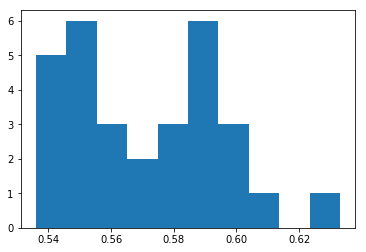

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(cross_val_score(clf,X,y,cv=30))

# MÁQUINA DE VECTOR DE SOPORTE

In [46]:
from sklearn.svm import SVC

In [47]:
clf = SVC()

In [48]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
clf.predict

<bound method SVC.predict of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [51]:
clf.predict_proba(X)

AttributeError: predict_proba is not available when  probability=False